<a href="https://colab.research.google.com/github/Rongxuan-Zhou/Autonomous-Driving-Scene-Analysis-Using-Waymo-Dataset/blob/main/WAYMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
!pip install mcap --upgrade
!pip install tqdm --upgrade
!pip install numpy pandas matplotlib seaborn
!pip install plotly

In [43]:
# 验证文件是否存在
!ls -la /content/drive/MyDrive/waymo-scene.mcap
!ls -la /content/drive/MyDrive/waymo-scene-layout.json

-rw------- 1 root root 1363449399 Mar 29 06:31 /content/drive/MyDrive/waymo-scene.mcap
-rw------- 1 root root 30184 Mar 29 06:31 /content/drive/MyDrive/waymo-scene-layout.json


In [44]:
from mcap.reader import make_reader
from tqdm import tqdm
from collections import Counter

file_path = "/content/drive/MyDrive/waymo-scene.mcap"

with open(file_path, "rb") as f:
    reader = make_reader(f)

    # 创建一个列表来存储主题
    topics = []

    # 使用 tqdm 处理消息并显示进度条
    for schema, channel, message in tqdm(reader.iter_messages()):
        print(f"主题: {channel.topic}, 时间戳: {message.log_time}, 消息长度: {len(message.data)} bytes")
        topics.append(channel.topic)  # 将主题添加到列表中

    # 统计主题出现次数
    topic_counter = Counter(topics)

    print("\n主题统计:")
    for topic, count in topic_counter.items():
        print(f" {topic}: {count}")

777it [00:00, 3936.78it/s]

主题: /CAMERA_FRONT/annotations_2d, 时间戳: 1507939794765751000, 消息长度: 2758 bytes
主题: /CAMERA_FRONT/annotations_3d, 时间戳: 1507939794765751000, 消息长度: 8028 bytes
主题: /CAMERA_FRONT/camera_info, 时间戳: 1507939794765751000, 消息长度: 337 bytes
主题: /CAMERA_FRONT/compressed_image, 时间戳: 1507939794765751000, 消息长度: 418011 bytes
主题: /CAMERA_FRONT/compressed_image_downsampled, 时间戳: 1507939794765751000, 消息长度: 62712 bytes
主题: /CAMERA_FRONT/lidar, 时间戳: 1507939794765751000, 消息长度: 289765 bytes
主题: /CAMERA_FRONT_LEFT/annotations_2d, 时间戳: 1507939794765751000, 消息长度: 2192 bytes
主题: /CAMERA_FRONT_LEFT/annotations_3d, 时间戳: 1507939794765751000, 消息长度: 14984 bytes
主题: /CAMERA_FRONT_LEFT/camera_info, 时间戳: 1507939794765751000, 消息长度: 342 bytes
主题: /CAMERA_FRONT_LEFT/compressed_image, 时间戳: 1507939794765751000, 消息长度: 362119 bytes
主题: /CAMERA_FRONT_LEFT/compressed_image_downsampled, 时间戳: 1507939794765751000, 消息长度: 66775 bytes
主题: /CAMERA_FRONT_LEFT/lidar, 时间戳: 1507939794765751000, 消息长度: 318215 bytes
主题: /CAMERA_FRONT_RIGHT/annot

1636it [00:00, 4122.96it/s]

主题: /CAMERA_FRONT_RIGHT/annotations_3d, 时间戳: 1507939796266457000, 消息长度: 3744 bytes
主题: /CAMERA_FRONT_RIGHT/camera_info, 时间戳: 1507939796266457000, 消息长度: 342 bytes
主题: /CAMERA_FRONT_RIGHT/compressed_image, 时间戳: 1507939796266457000, 消息长度: 587012 bytes
主题: /CAMERA_FRONT_RIGHT/compressed_image_downsampled, 时间戳: 1507939796266457000, 消息长度: 103323 bytes
主题: /CAMERA_FRONT_RIGHT/lidar, 时间戳: 1507939796266457000, 消息长度: 398097 bytes
主题: /CAMERA_FRONT_RIGHT/segmentation, 时间戳: 1507939796266457000, 消息长度: 28867 bytes
主题: /CAMERA_SIDE_LEFT/annotations_2d, 时间戳: 1507939796266457000, 消息长度: 680 bytes
主题: /CAMERA_SIDE_LEFT/annotations_3d, 时间戳: 1507939796266457000, 消息长度: 8019 bytes
主题: /CAMERA_SIDE_LEFT/camera_info, 时间戳: 1507939796266457000, 消息长度: 340 bytes
主题: /CAMERA_SIDE_LEFT/compressed_image, 时间戳: 1507939796266457000, 消息长度: 277658 bytes
主题: /CAMERA_SIDE_LEFT/compressed_image_downsampled, 时间戳: 1507939796266457000, 消息长度: 48021 bytes
主题: /CAMERA_SIDE_LEFT/lidar, 时间戳: 1507939796266457000, 消息长度: 376347 bytes
主

2563it [00:00, 4280.16it/s]

主题: /LIDAR_SIDE_RIGHT, 时间戳: 1507939797768450000, 消息长度: 79993 bytes
主题: /LIDAR_TOP_downsampled, 时间戳: 1507939797768450000, 消息长度: 967006 bytes
主题: /LIDAR_TOP, 时间戳: 1507939797768450000, 消息长度: 2900767 bytes
主题: /markers/annotations/pedestrians, 时间戳: 1507939797768450000, 消息长度: 180 bytes
主题: /markers/annotations/signs, 时间戳: 1507939797768450000, 消息长度: 3240 bytes
主题: /markers/annotations/vehicles, 时间戳: 1507939797768450000, 消息长度: 9063 bytes
主题: /stats, 时间戳: 1507939797768450000, 消息长度: 363 bytes
主题: /tf, 时间戳: 1507939797768450000, 消息长度: 106 bytes
主题: /tf, 时间戳: 1507939797768450000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939797768450000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939797768450000, 消息长度: 112 bytes
主题: /tf, 时间戳: 1507939797768450000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939797768450000, 消息长度: 67 bytes
主题: /tf, 时间戳: 1507939797768450000, 消息长度: 96 bytes
主题: /tf, 时间戳: 1507939797768450000, 消息长度: 109 bytes
主题: /tf, 时间戳: 1507939797768450000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939797768450000, 消息长度: 95 bytes
主题: 

3495it [00:00, 4495.35it/s]

主题: /LIDAR_TOP, 时间戳: 1507939799268633000, 消息长度: 2843027 bytes
主题: /markers/annotations/pedestrians, 时间戳: 1507939799268633000, 消息长度: 180 bytes
主题: /markers/annotations/signs, 时间戳: 1507939799268633000, 消息长度: 3240 bytes
主题: /markers/annotations/vehicles, 时间戳: 1507939799268633000, 消息长度: 9405 bytes
主题: /stats, 时间戳: 1507939799268633000, 消息长度: 363 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 106 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 112 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 67 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 96 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 109 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 95 bytes
主题: /tf, 时间戳: 1507939799268633000, 消息长度: 97 bytes
主题: /CAMERA_FRONT/annotations_2d, 时间戳: 1507939799368602000, 消息长度: 3470 bytes
主题: /CAMERA_FRONT

4385it [00:01, 4340.60it/s]

主题: /LIDAR_TOP, 时间戳: 1507939800868951000, 消息长度: 2879447 bytes
主题: /markers/annotations/pedestrians, 时间戳: 1507939800868951000, 消息长度: 720 bytes
主题: /markers/annotations/signs, 时间戳: 1507939800868951000, 消息长度: 2700 bytes
主题: /markers/annotations/vehicles, 时间戳: 1507939800868951000, 消息长度: 9063 bytes
主题: /stats, 时间戳: 1507939800868951000, 消息长度: 363 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 106 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 112 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 67 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 96 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 109 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 95 bytes
主题: /tf, 时间戳: 1507939800868951000, 消息长度: 97 bytes
主题: /stats, 时间戳: 1507939800868951040, 消息长度: 202 bytes
主题: /CAMERA_FRONT/annotations_2d, 时间戳: 1

4820it [00:01, 4144.80it/s]

主题: /LIDAR_SIDE_RIGHT, 时间戳: 1507939802368946000, 消息长度: 81913 bytes
主题: /LIDAR_TOP_downsampled, 时间戳: 1507939802368946000, 消息长度: 972266 bytes
主题: /LIDAR_TOP, 时间戳: 1507939802368946000, 消息长度: 2916547 bytes
主题: /markers/annotations/pedestrians, 时间戳: 1507939802368946000, 消息长度: 720 bytes
主题: /markers/annotations/signs, 时间戳: 1507939802368946000, 消息长度: 2700 bytes
主题: /markers/annotations/vehicles, 时间戳: 1507939802368946000, 消息长度: 8721 bytes
主题: /stats, 时间戳: 1507939802368946000, 消息长度: 363 bytes
主题: /tf, 时间戳: 1507939802368946000, 消息长度: 106 bytes
主题: /tf, 时间戳: 1507939802368946000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939802368946000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939802368946000, 消息长度: 112 bytes
主题: /tf, 时间戳: 1507939802368946000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939802368946000, 消息长度: 67 bytes
主题: /tf, 时间戳: 1507939802368946000, 消息长度: 96 bytes
主题: /tf, 时间戳: 1507939802368946000, 消息长度: 109 bytes
主题: /tf, 时间戳: 1507939802368946000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939802368946000, 消息长度: 95 bytes
主题: 

5636it [00:01, 3858.27it/s]

主题: /markers/annotations/pedestrians, 时间戳: 1507939803568613000, 消息长度: 900 bytes
主题: /markers/annotations/signs, 时间戳: 1507939803568613000, 消息长度: 2160 bytes
主题: /markers/annotations/vehicles, 时间戳: 1507939803568613000, 消息长度: 8379 bytes
主题: /stats, 时间戳: 1507939803568613000, 消息长度: 363 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 106 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 112 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 67 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 96 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 109 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 95 bytes
主题: /tf, 时间戳: 1507939803568613000, 消息长度: 97 bytes
主题: /stats, 时间戳: 1507939803568613120, 消息长度: 202 bytes
主题: /stats, 时间戳: 1507939803668637952, 消息长度: 202 bytes
主题: /CAMERA_FRONT/annotations_2d, 时间戳: 150793980

6432it [00:01, 3886.43it/s]

主题: /CAMERA_SIDE_RIGHT/compressed_image_downsampled, 时间戳: 1507939804869343000, 消息长度: 60230 bytes
主题: /CAMERA_SIDE_RIGHT/lidar, 时间戳: 1507939804869343000, 消息长度: 350121 bytes
主题: /CAMERA_SIDE_RIGHT/segmentation, 时间戳: 1507939804869343000, 消息长度: 22018 bytes
主题: /LIDAR_FRONT_downsampled, 时间戳: 1507939804869343000, 消息长度: 36748 bytes
主题: /LIDAR_FRONT, 时间戳: 1507939804869343000, 消息长度: 73388 bytes
主题: /LIDAR_REAR_downsampled, 时间戳: 1507939804869343000, 消息长度: 39447 bytes
主题: /LIDAR_REAR, 时间戳: 1507939804869343000, 消息长度: 78767 bytes
主题: /LIDAR_SIDE_LEFT_downsampled, 时间戳: 1507939804869343000, 消息长度: 36112 bytes
主题: /LIDAR_SIDE_LEFT, 时间戳: 1507939804869343000, 消息长度: 72112 bytes
主题: /LIDAR_SIDE_RIGHT_downsampled, 时间戳: 1507939804869343000, 消息长度: 40493 bytes
主题: /LIDAR_SIDE_RIGHT, 时间戳: 1507939804869343000, 消息长度: 80873 bytes
主题: /LIDAR_TOP_downsampled, 时间戳: 1507939804869343000, 消息长度: 982246 bytes
主题: /LIDAR_TOP, 时间戳: 1507939804869343000, 消息长度: 2946507 bytes
主题: /markers/annotations/pedestrians, 时间戳: 150793980

7239it [00:01, 3935.89it/s]

主题: /markers/annotations/pedestrians, 时间戳: 1507939806268869000, 消息长度: 900 bytes
主题: /markers/annotations/signs, 时间戳: 1507939806268869000, 消息长度: 1800 bytes
主题: /markers/annotations/vehicles, 时间戳: 1507939806268869000, 消息长度: 6669 bytes
主题: /stats, 时间戳: 1507939806268869000, 消息长度: 363 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 106 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 112 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 67 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 96 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 109 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 95 bytes
主题: /tf, 时间戳: 1507939806268869000, 消息长度: 97 bytes
主题: /CAMERA_FRONT/annotations_2d, 时间戳: 1507939806368823000, 消息长度: 1781 bytes
主题: /CAMERA_FRONT/annotations_3d, 时间戳: 1507939806368823000, 消息长度: 2676 bytes
主题

8047it [00:01, 3954.84it/s]

主题: /markers/annotations/pedestrians, 时间戳: 1507939807668806000, 消息长度: 900 bytes
主题: /markers/annotations/signs, 时间戳: 1507939807668806000, 消息长度: 1620 bytes
主题: /markers/annotations/vehicles, 时间戳: 1507939807668806000, 消息长度: 5301 bytes
主题: /stats, 时间戳: 1507939807668806000, 消息长度: 362 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 106 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 112 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 67 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 96 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 109 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 95 bytes
主题: /tf, 时间戳: 1507939807668806000, 消息长度: 97 bytes
主题: /stats, 时间戳: 1507939807668806144, 消息长度: 203 bytes
主题: /stats, 时间戳: 1507939807768843776, 消息长度: 202 bytes
主题: /CAMERA_FRONT/annotations_2d, 时间戳: 150793980

8891it [00:02, 4057.95it/s]

主题: /CAMERA_FRONT_RIGHT/annotations_2d, 时间戳: 1507939809168854000, 消息长度: 1477 bytes
主题: /CAMERA_FRONT_RIGHT/annotations_3d, 时间戳: 1507939809168854000, 消息长度: 6093 bytes
主题: /CAMERA_FRONT_RIGHT/camera_info, 时间戳: 1507939809168854000, 消息长度: 342 bytes
主题: /CAMERA_FRONT_RIGHT/compressed_image, 时间戳: 1507939809168854000, 消息长度: 541156 bytes
主题: /CAMERA_FRONT_RIGHT/compressed_image_downsampled, 时间戳: 1507939809168854000, 消息长度: 101005 bytes
主题: /CAMERA_FRONT_RIGHT/lidar, 时间戳: 1507939809168854000, 消息长度: 362087 bytes
主题: /CAMERA_SIDE_LEFT/camera_info, 时间戳: 1507939809168854000, 消息长度: 340 bytes
主题: /CAMERA_SIDE_LEFT/compressed_image, 时间戳: 1507939809168854000, 消息长度: 292557 bytes
主题: /CAMERA_SIDE_LEFT/compressed_image_downsampled, 时间戳: 1507939809168854000, 消息长度: 49751 bytes
主题: /CAMERA_SIDE_LEFT/lidar, 时间戳: 1507939809168854000, 消息长度: 384013 bytes
主题: /CAMERA_SIDE_RIGHT/annotations_2d, 时间戳: 1507939809168854000, 消息长度: 1322 bytes
主题: /CAMERA_SIDE_RIGHT/annotations_3d, 时间戳: 1507939809168854000, 消息长度: 7911 byt

9703it [00:02, 3988.17it/s]

主题: /LIDAR_TOP, 时间戳: 1507939810568468000, 消息长度: 2877807 bytes
主题: /markers/annotations/pedestrians, 时间戳: 1507939810568468000, 消息长度: 720 bytes
主题: /markers/annotations/signs, 时间戳: 1507939810568468000, 消息长度: 1440 bytes
主题: /markers/annotations/vehicles, 时间戳: 1507939810568468000, 消息长度: 4617 bytes
主题: /stats, 时间戳: 1507939810568468000, 消息长度: 362 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 106 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 112 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 67 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 96 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 109 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 95 bytes
主题: /tf, 时间戳: 1507939810568468000, 消息长度: 97 bytes
主题: /stats, 时间戳: 1507939810668497920, 消息长度: 203 bytes
主题: /CAMERA_FRONT/annotations_2d, 时间戳: 1

10525it [00:02, 3993.29it/s]

主题: /CAMERA_FRONT/segmentation, 时间戳: 1507939812069050000, 消息长度: 29543 bytes
主题: /CAMERA_FRONT_LEFT/camera_info, 时间戳: 1507939812069050000, 消息长度: 341 bytes
主题: /CAMERA_FRONT_LEFT/compressed_image, 时间戳: 1507939812069050000, 消息长度: 387102 bytes
主题: /CAMERA_FRONT_LEFT/compressed_image_downsampled, 时间戳: 1507939812069050000, 消息长度: 65087 bytes
主题: /CAMERA_FRONT_LEFT/lidar, 时间戳: 1507939812069050000, 消息长度: 305363 bytes
主题: /CAMERA_FRONT_LEFT/segmentation, 时间戳: 1507939812069050000, 消息长度: 24163 bytes
主题: /CAMERA_FRONT_RIGHT/annotations_3d, 时间戳: 1507939812069050000, 消息长度: 963 bytes
主题: /CAMERA_FRONT_RIGHT/camera_info, 时间戳: 1507939812069050000, 消息长度: 342 bytes
主题: /CAMERA_FRONT_RIGHT/compressed_image, 时间戳: 1507939812069050000, 消息长度: 571646 bytes
主题: /CAMERA_FRONT_RIGHT/compressed_image_downsampled, 时间戳: 1507939812069050000, 消息长度: 106384 bytes
主题: /CAMERA_FRONT_RIGHT/lidar, 时间戳: 1507939812069050000, 消息长度: 388637 bytes
主题: /CAMERA_FRONT_RIGHT/segmentation, 时间戳: 1507939812069050000, 消息长度: 29235 bytes
主题

11407it [00:02, 4050.09it/s]

主题: /markers/annotations/pedestrians, 时间戳: 1507939813369172000, 消息长度: 720 bytes
主题: /markers/annotations/signs, 时间戳: 1507939813369172000, 消息长度: 1260 bytes
主题: /markers/annotations/vehicles, 时间戳: 1507939813369172000, 消息长度: 2394 bytes
主题: /stats, 时间戳: 1507939813369172000, 消息长度: 362 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 106 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 112 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 111 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 67 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 96 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 109 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 110 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 95 bytes
主题: /tf, 时间戳: 1507939813369172000, 消息长度: 97 bytes
主题: /stats, 时间戳: 1507939813369172224, 消息长度: 202 bytes
主题: /stats, 时间戳: 1507939813469172992, 消息长度: 202 bytes
主题: /CAMERA_FRONT/annotations_2d, 时间戳: 150793981

In [45]:
import mcap
from mcap.reader import make_reader
import json
import pandas as pd
from tqdm import tqdm

# 确保文件保持打开状态
mcap_file_path = '/content/drive/MyDrive/waymo-scene.mcap'
mcap_file = open(mcap_file_path, 'rb')  # 明确打开文件并保存引用
reader = make_reader(mcap_file)  # 使用打开的文件创建reader

# 创建一个列表存储提取的特征
extracted_features = []

# 使用tqdm显示进度
for schema, channel, message in tqdm(reader.iter_messages()):
    # 尝试解析消息内容
    try:
        # 记录基本信息
        feature = {
            'timestamp': message.log_time,
            'topic': channel.topic,
            'message_size': len(message.data)
        }

        # 不要尝试将二进制数据解码为UTF-8
        # 如果需要处理消息内容，应该根据消息类型使用适当的解码器
        # 例如，如果是Protobuf，应该使用protobuf库解码

        extracted_features.append(feature)
    except Exception as e:
        print(f"处理消息时出错: {str(e)}")

# 完成后关闭文件
mcap_file.close()

# 创建数据框
features_df = pd.DataFrame(extracted_features)
print(f"共提取了 {len(features_df)} 条特征记录")
features_df.head()


11407it [00:02, 4623.49it/s]

共提取了 11407 条特征记录


,timestamp,topic,message_size
0,1507939794765751000,/CAMERA_FRONT/annotations_2d,2758
1,1507939794765751000,/CAMERA_FRONT/annotations_3d,8028
2,1507939794765751000,/CAMERA_FRONT/camera_info,337
3,1507939794765751000,/CAMERA_FRONT/compressed_image,418011
4,1507939794765751000,/CAMERA_FRONT/compressed_image_downsampled,62712


In [46]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=features_df)

https://docs.google.com/spreadsheets/d/1TOvw3YO8vkT3QdJxkuAgg1Mg9YRXv5nFUEvD7R_K8Hc/edit#gid=0


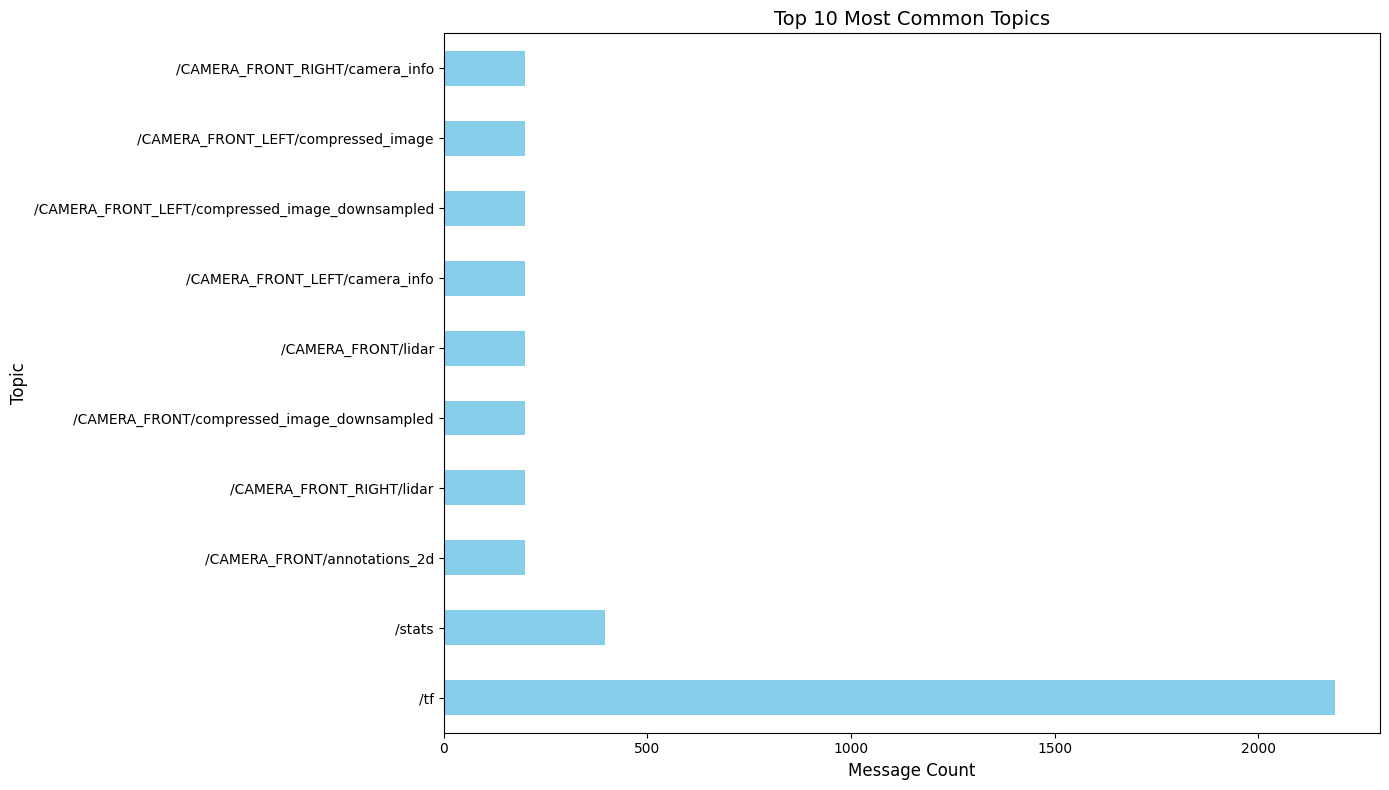

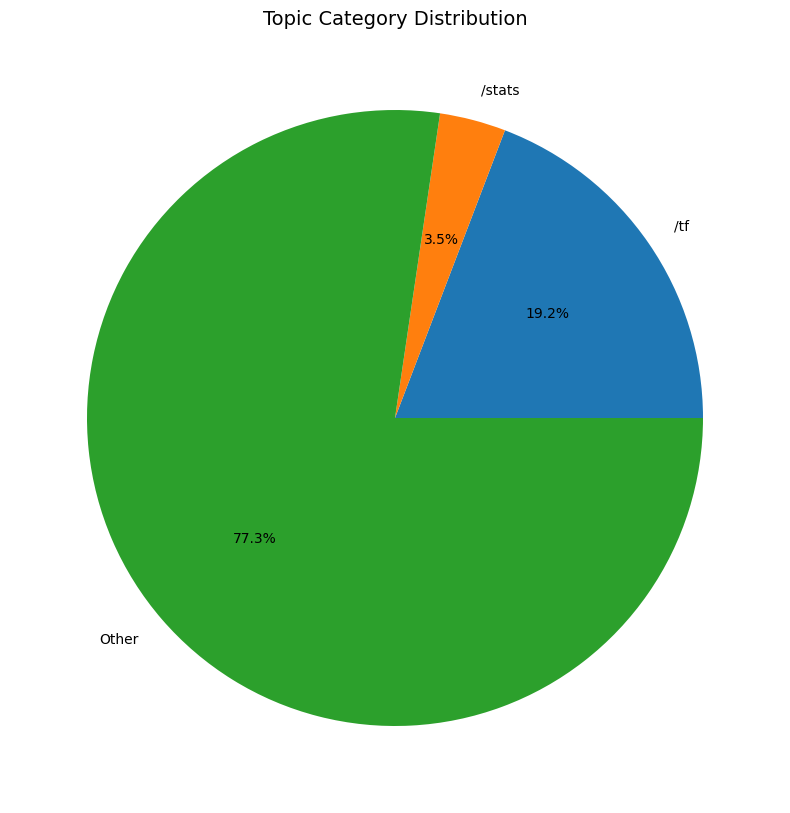

In [47]:
# Optimized topic distribution visualization
plt.figure(figsize=(14, 8))  # Increase chart size

# Get the top 10 most common topics
top_topics = topic_counts.head(10)

# Create horizontal bar chart
top_topics.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Topics', fontsize=14)
plt.xlabel('Message Count', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.tight_layout()
plt.show()

# Create pie chart showing topic category distribution
plt.figure(figsize=(10, 10))
# Merge small categories into "Other"
threshold = topic_counts.sum() * 0.02  # 2% threshold
other_topics = topic_counts[topic_counts < threshold].sum()
major_topics = topic_counts[topic_counts >= threshold]
if other_topics > 0:
    major_topics['Other'] = other_topics

major_topics.plot(kind='pie', autopct='%1.1f%%')
plt.title('Topic Category Distribution', fontsize=14)
plt.ylabel('')
plt.show()


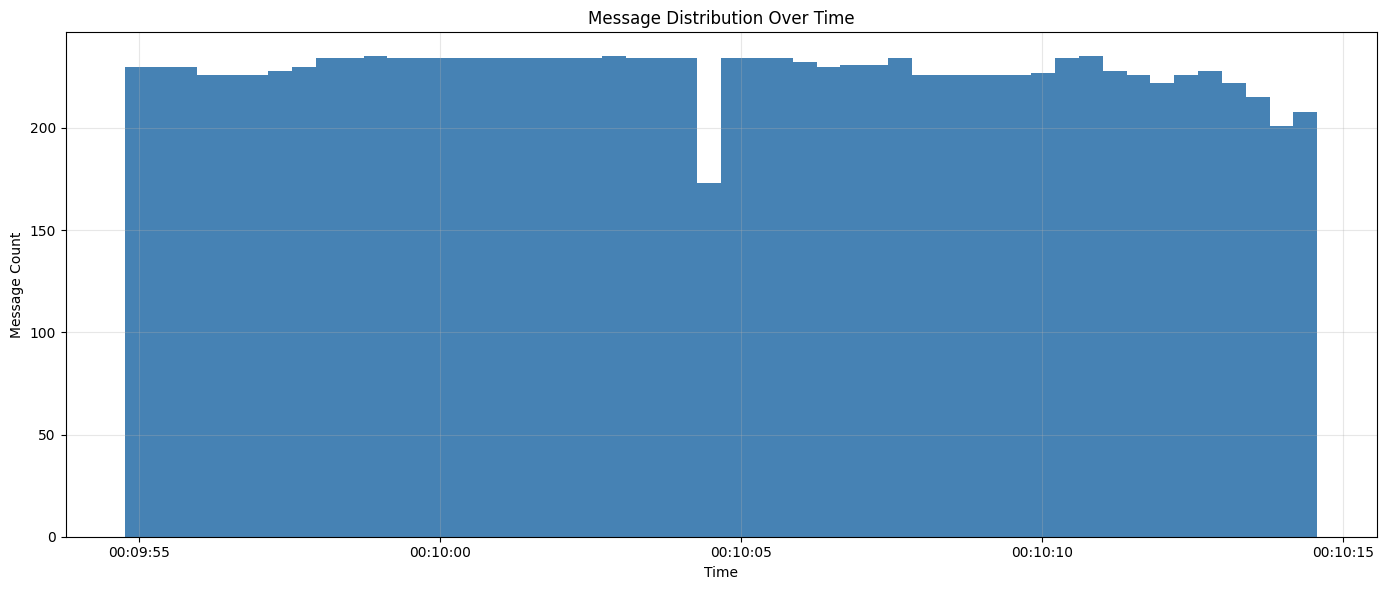

In [48]:
# Convert timestamps to datetime objects for time analysis
features_df['datetime'] = pd.to_datetime(features_df['timestamp'], unit='ns')

# Sort by time
features_df_sorted = features_df.sort_values('datetime')

# Plot message frequency over time
plt.figure(figsize=(14, 6))
plt.hist(features_df_sorted['datetime'], bins=50, color='steelblue')
plt.title('Message Distribution Over Time')
plt.xlabel('Time')
plt.ylabel('Message Count')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


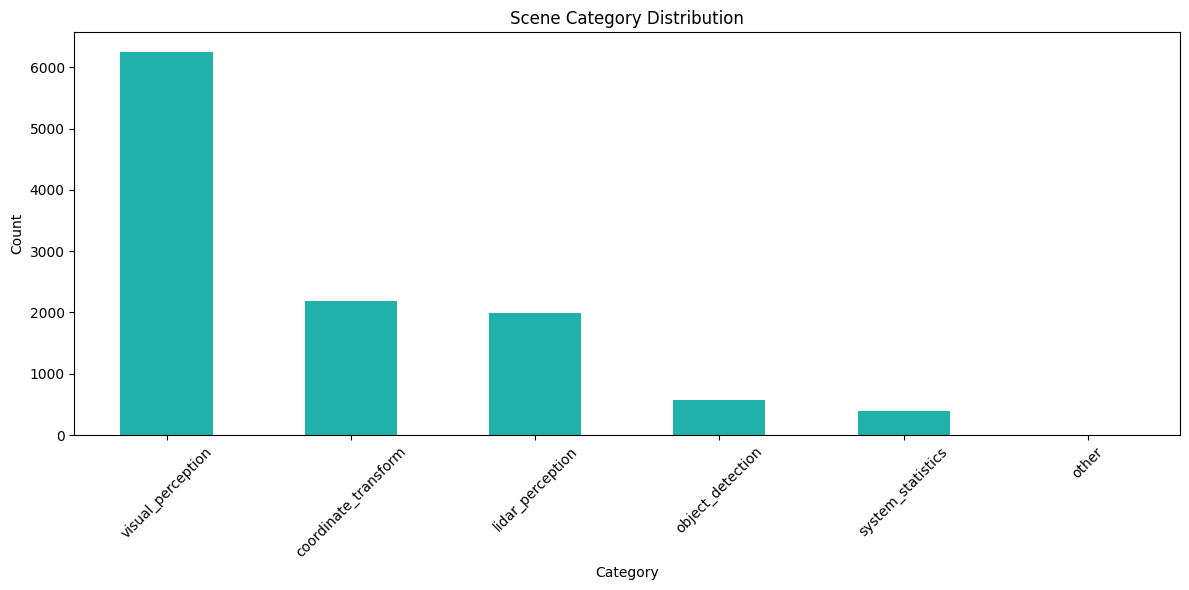

In [49]:
# Create a function to classify scenes based on topic patterns
def classify_scene(row):
    topic = row['topic']

    if 'camera' in topic.lower():
        return 'visual_perception'
    elif 'lidar' in topic.lower():
        return 'lidar_perception'
    elif 'annotations' in topic.lower():
        return 'object_detection'
    elif 'tf' in topic.lower():
        return 'coordinate_transform'
    elif 'stats' in topic.lower():
        return 'system_statistics'
    else:
        return 'other'

# Apply classification
features_df['scene_category'] = features_df.apply(classify_scene, axis=1)

# Visualize scene categories
plt.figure(figsize=(12, 6))
scene_counts = features_df['scene_category'].value_counts()
scene_counts.plot(kind='bar', color='lightseagreen')
plt.title('Scene Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


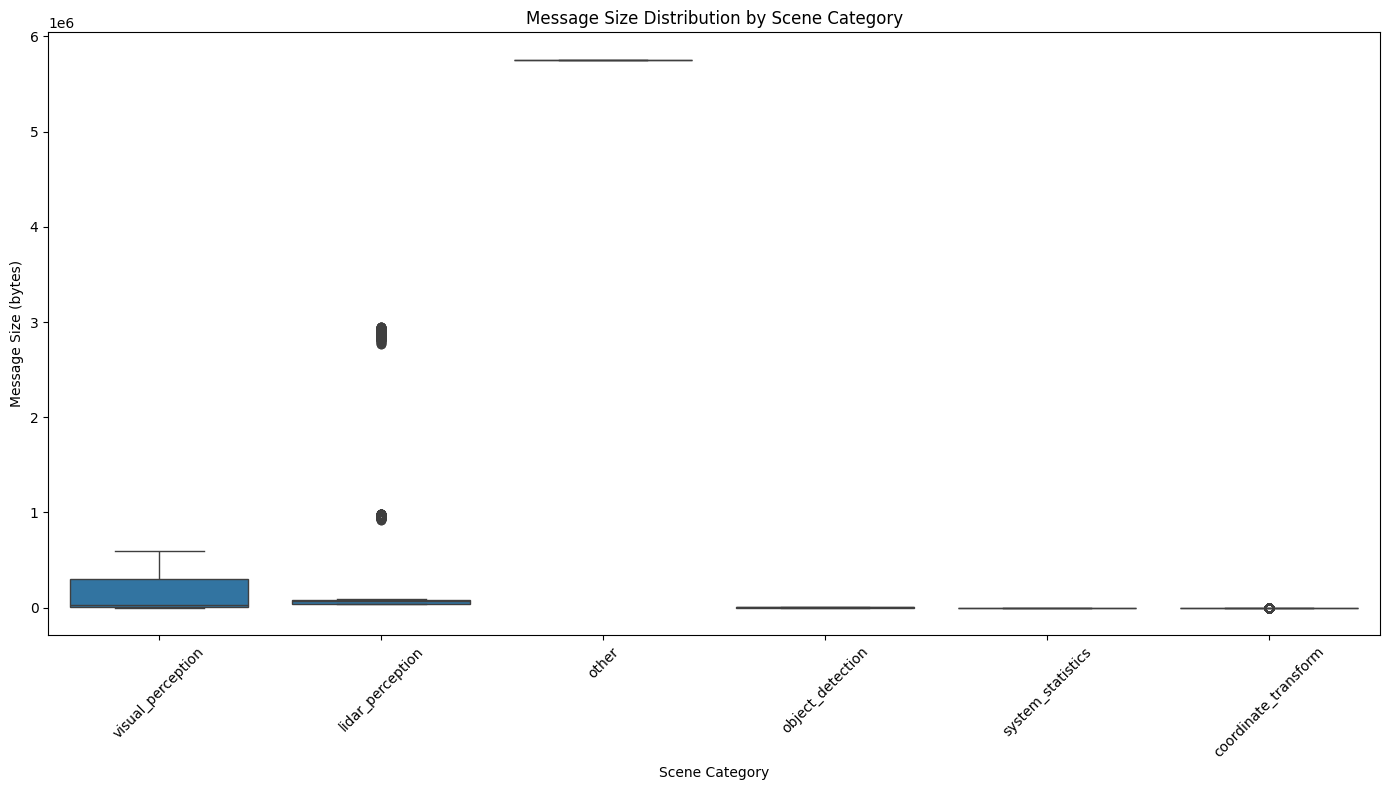

In [50]:
# Create boxplot of message sizes by category
plt.figure(figsize=(14, 8))
import seaborn as sns

# Use seaborn for better visualization
sns.boxplot(x='scene_category', y='message_size', data=features_df)
plt.title('Message Size Distribution by Scene Category')
plt.xlabel('Scene Category')
plt.ylabel('Message Size (bytes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


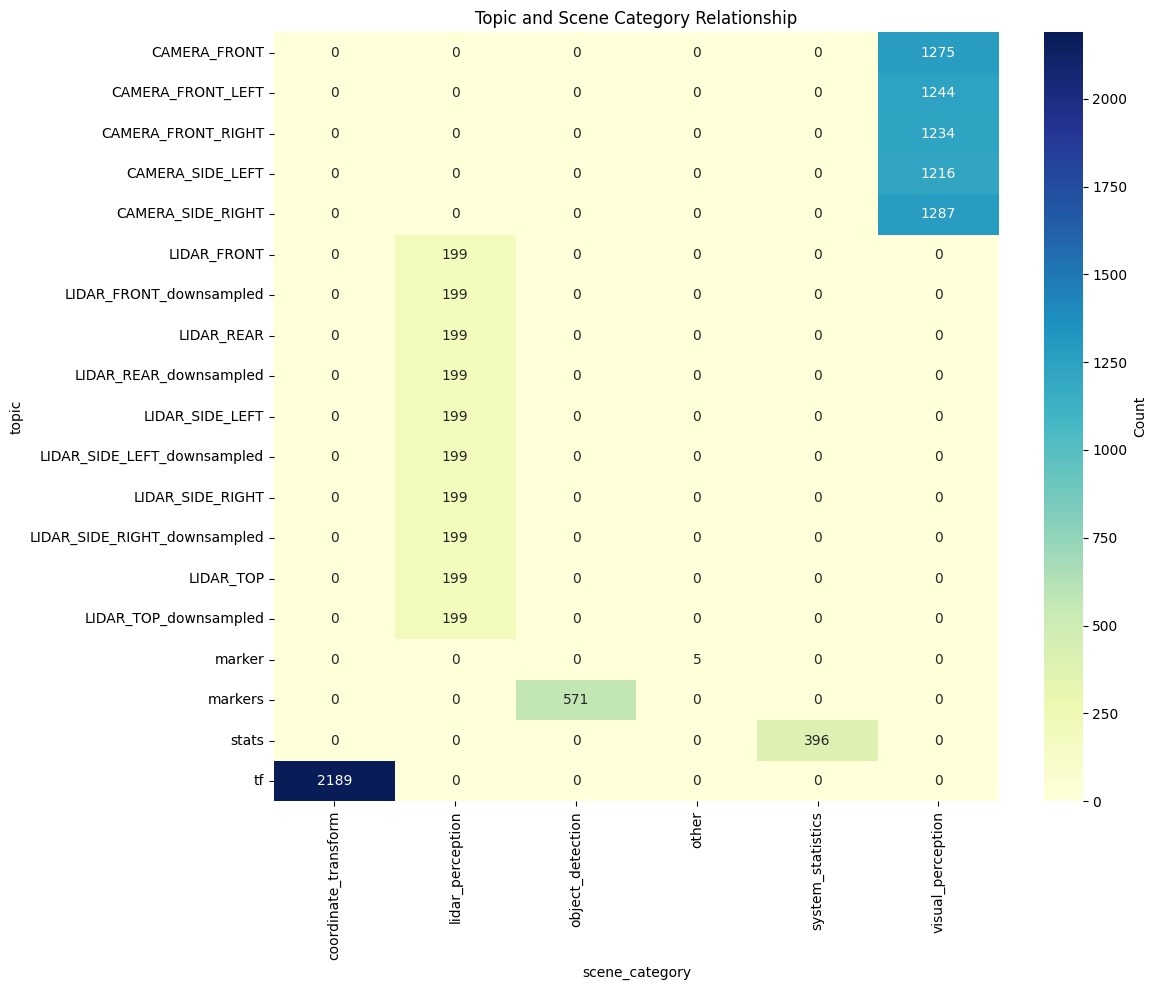

In [51]:
# Create a pivot table for topic co-occurrence
topic_pivot = pd.crosstab(
    features_df['topic'].apply(lambda x: x.split('/')[1] if len(x.split('/')) > 1 else x),
    features_df['scene_category']
)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(topic_pivot, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Topic and Scene Category Relationship')
plt.tight_layout()
plt.show()
